In [ ]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd 
import kagglehub
import os 
import shutil
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
# Dataset downloading and importing as pandas DataFrame
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression") 

for file in os.listdir(path):
    src = os.path.join(path, file)
    dst = os.path.join(".", file)
    shutil.copy2(src, dst)
    print(f"Copied {file} to current directory")

print("Path to dataset files:", path)

df=pd.read_csv("Salary_dataset.csv")


Copied Salary_dataset.csv to current directory
Path to dataset files: C:\Users\shash\.cache\kagglehub\datasets\abhishek14398\salary-dataset-simple-linear-regression\versions\1


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


In [6]:
print("count of null values in data-",df.isnull().sum())

count of null values in data- Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


In [7]:
# Get range for integer columns
for col in df.select_dtypes(include=['int64','float64']).columns:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col}: Range [{min_val}, {max_val}]")

Unnamed: 0: Range [0, 29]
YearsExperience: Range [1.2000000000000002, 10.6]
Salary: Range [37732.0, 122392.0]


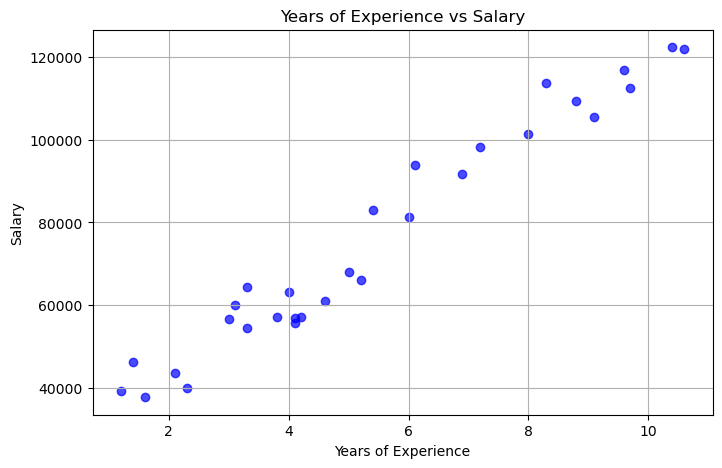

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', alpha=0.7)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.grid(True)
plt.show()

In [9]:
df['ExperienceBucket'] = pd.cut(df['YearsExperience'], bins=5)
df['ExperienceBucket'].value_counts().sort_index().values

array([6, 9, 5, 4, 6], dtype=int64)

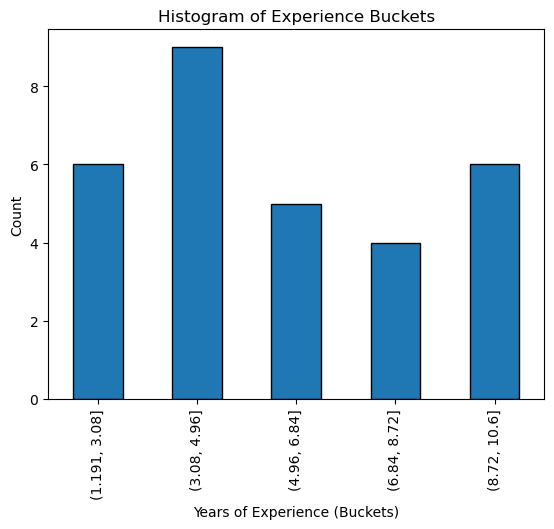

In [10]:
df['ExperienceBucket'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel('Years of Experience (Buckets)')
plt.ylabel('Count')
plt.title('Histogram of Experience Buckets')
plt.show()

In [11]:
# by analysing this bar plot we can see that most of the employees have experience between 1 to 4 years and then 4 to 7 years.
# so in ideal scenario we should evaluate the model for every bucket of experience but here we are not doing that.

In [12]:
# model building ,training and testing

X = df[['YearsExperience']]  # Features
y = df['Salary']             # Target

# Split with common parameters
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for testing
    random_state=42,      # Reproducible results
    shuffle=True          # Shuffle before splitting (default)(coz this ain't time series )
)

In [13]:
# training the model
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred=model.predict(X_test)

Mean Absolute Error: 6286.453830757745
Mean Squared Error: 49830096.855908334
R^2 Score: 0.9024461774180498


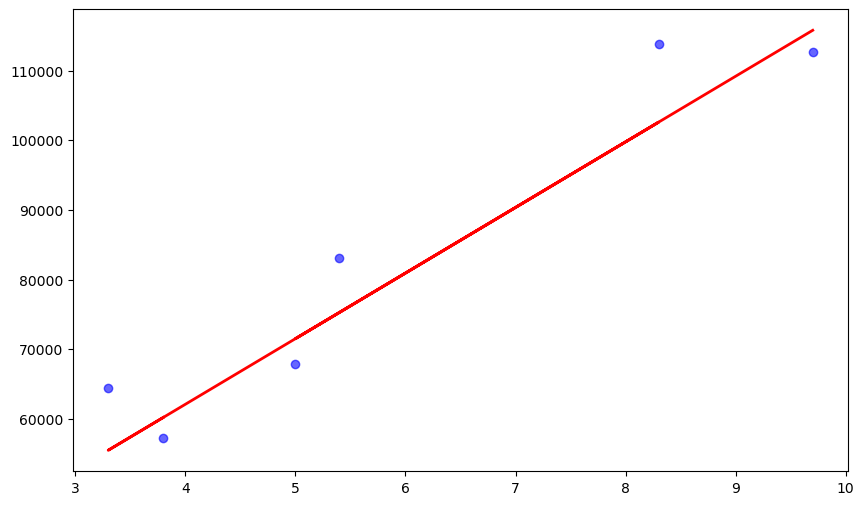

In [20]:
# model evaluation 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')